# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [9]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
b=a[a["sex"] == "Male"]
c=a[a.sex == "Female"]
print("number of men is ")
print(b["sex"].count())
print("number of women is ")
print(c["sex"].count())


number of men is 
21790
number of women is 
10771


### Вопрос 2
Каков средний возраст мужчин?


In [5]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
b=a[a.sex == "Male"]
print("mean age of men is")
print(b["age"].mean())

mean age of men is
39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [7]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
b=a[a["native-country"] == "United-States"]
print("share of US citizens is")
print(b["native-country"].count() / a["native-country"].count())

share of US citizens is
0.895857006849


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

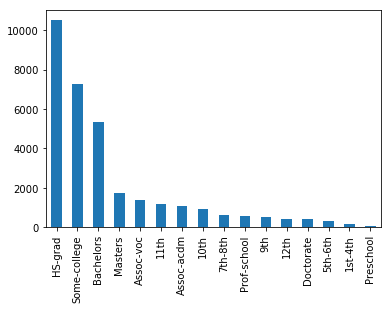

In [22]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd



a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

%matplotlib inline 

plt.show()
b=a["education"].value_counts()
b.plot(kind = "bar")

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [92]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

b=a[a["marital-status"] == "Divorced"]

print("mean final weight is")
print(b["fnlwgt"].mean())

print("standard deviation of final weight is")
print(b["fnlwgt"].std())



mean final weight is
185802.79045689848
standard deviation of final weight is
105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

0.44458614972580029

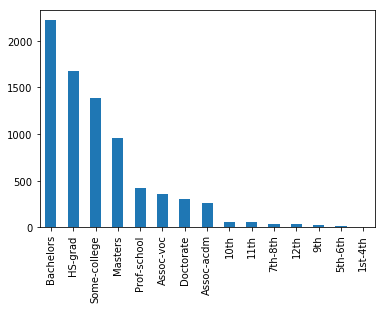

In [95]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

b=a[a["50K"] == ">50K"] 
c=b["education"].value_counts()

plt.show()

c.plot(kind = "bar")

(c["Bachelors"]+c["Masters"]+c["Doctorate"])/(b["50K"].count())


как можно видеть, доля бакалавров магистров и докторов среди зарадатывающих >50K составляет примерно 44% => зарабатывющие больше 50К люди в основном не имеют высшего образования

# Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [52]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

print("maximum ages of men are:")
m=a[a["sex"] == "Male"]
print(m.groupby("race")["age"].max())

print("\n\n")
print("maximum ages of women are:")
f=a[a["sex"] == "Female"]
print(f.groupby("race")["age"].max())


maximum ages of men are:
race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64



maximum ages of women are:
race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [91]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

b=a[a["occupation"] == "Farming-fishing"]

print("people from these countries work as farmers and fishers:")
print(b["native-country"].value_counts().keys())

people from these countries work as farmers and fishers:
Index(['United-States', 'Mexico', 'Puerto-Rico', '?', 'Philippines',
       'Guatemala', 'Italy', 'El-Salvador', 'Vietnam', 'Cuba', 'Canada',
       'Hong', 'Yugoslavia', 'Poland', 'Portugal', 'Japan', 'France',
       'Germany', 'Ireland', 'England', 'Cambodia'],
      dtype='object')


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [71]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

mb = a[(a["sex"] == "Male") & (a["education"] == "Bachelors")]
mm = a[(a["sex"] == "Male") & (a["education"] == "Masters")]
fb = a[(a["sex"] == "Female") & (a["education"] == "Bachelors")]
fm = a[(a["sex"] == "Female") & (a["education"] == "Masters")]

ratio1 = mb["sex"].count()/mm["sex"].count()
ratio2 = fb["sex"].count()/fm["sex"].count()

if (ratio1>ratio2):
    print("ratio 1 > ratio 2")
elif (ratio1<ratio2):
    print("ratio 2 > ratio 1")
else: print("ratio 2 = ratio 1")

ratio 1 > ratio 2


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [90]:
a=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

maxhpw = a["hours-per-week"].max()
b=a[a["hours-per-week"] == maxhpw]

print("maximum hours per week = " + str(maxhpw))
print("number of people who work " + str(maxhpw) + " hours = " + str(b["50K"].count()))
print


c=b["50K"].value_counts()
print("number of people who earn <=50K and >50K respectively: ")
print(c)

maximum hours per week = 99
number of people who work 99 hours = 85
number of people who earn <=50K and >50K respectively: 
<=50K    60
>50K     25
Name: 50K, dtype: int64
